## Анализ

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("pastel")

#### Датасет по Титанику

#### Столбцы:

* **PassengerId** - id пассажира
* **Survived** - выжил пассажир или нет (0 и 1 соответственно)
* **Pclass** - класс билета
* **Name** - ФИО
* **Sex** - пол
* **Age** - возраст
* **SibSp** - количество братьев и сестер / супругов на борту 
* **Parch** - количество родителей / детей на борту 
* **Ticket** - номер билета
* **Fare** - стоимость билета
* **Cabin** - номер каюты
* **Embarked** - порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)

In [176]:
df = pd.read_csv("data_tms.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [177]:
df.shape

(891, 12)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [179]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Очень много пропусков в cabin (возможно, можно будет перевести в бинарный признак). В age их тоже много. В embarked всего 2 пропуска и их можно будет заполнить наиболее часто встречаемыми портами.

In [180]:
print("Полные дубликаты строк:", df.duplicated().sum())
print("Дубликаты PassengerId:", df["PassengerId"].duplicated().sum())
print("Дубликаты Name:", df["Name"].duplicated().sum())
print("Дубликаты Ticket:", df["Ticket"].duplicated().sum())
print("Дубликаты Cabin:", df["Cabin"].duplicated().sum())

Полные дубликаты строк: 0
Дубликаты PassengerId: 0
Дубликаты Name: 0
Дубликаты Ticket: 210
Дубликаты Cabin: 743


Можно увидеть, что есть дубликаты билетов (возможно, у семей). Большое количество дубликатов в каютах связано с тем, что 687 значений имеет NaN. И всего 56 дубликатов за исключением NaN.

In [181]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Можно увидеть, что в стоимости билетов есть нулевые значения. Общая доля выживших примерно 38%. Тип билетов показыает перекос в сторону 3-го класса.

#### Разберёмся с пропусками в Age

In [182]:
df["Age"] = df["Age"].fillna(df["Age"].median())

bins = [0, 16, 60, 120]
labels = ["child", "adult", "senior"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

df.drop(columns=["Age"], axis=1, inplace=True)

df["AgeGroup"].value_counts()

AgeGroup
adult     782
child      83
senior     26
Name: count, dtype: int64

In [183]:
# One-Hot Encoding (OHE)
df = pd.get_dummies(df, columns=["AgeGroup"])
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup_child,AgeGroup_adult,AgeGroup_senior
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,False,True,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,False,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,False,True,False
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,False,True,False


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   SibSp            891 non-null    int64  
 6   Parch            891 non-null    int64  
 7   Ticket           891 non-null    object 
 8   Fare             891 non-null    float64
 9   Cabin            204 non-null    object 
 10  Embarked         889 non-null    object 
 11  AgeGroup_child   891 non-null    bool   
 12  AgeGroup_adult   891 non-null    bool   
 13  AgeGroup_senior  891 non-null    bool   
dtypes: bool(3), float64(1), int64(5), object(5)
memory usage: 79.3+ KB


In [185]:
age_dummies = ["AgeGroup_child", "AgeGroup_adult", "AgeGroup_senior"]
df[age_dummies] = df[age_dummies].astype(int)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   SibSp            891 non-null    int64  
 6   Parch            891 non-null    int64  
 7   Ticket           891 non-null    object 
 8   Fare             891 non-null    float64
 9   Cabin            204 non-null    object 
 10  Embarked         889 non-null    object 
 11  AgeGroup_child   891 non-null    int64  
 12  AgeGroup_adult   891 non-null    int64  
 13  AgeGroup_senior  891 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 97.6+ KB


Разберёмся с каютами.

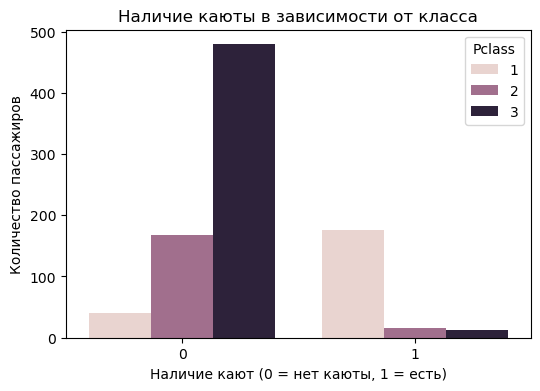

In [187]:
df["HasCabin"] = df["Cabin"].notna().astype(int)

plt.figure(figsize=(6,4))
sns.countplot(x="HasCabin", hue="Pclass", data=df)
plt.title("Наличие каюты в зависимости от класса")
plt.xlabel("Наличие кают (0 = нет каюты, 1 = есть)")
plt.ylabel("Количество пассажиров")
plt.show()

У первого класса почти у всех были каюты, у третего - нет. Второй класс перемешан.

In [188]:
df[["HasCabin", "Pclass"]].corr()

,HasCabin,Pclass
HasCabin,1.000000,-0.725541
Pclass,-0.725541,1.000000


По таблице корреляций видно, что HasCabin и Pclass сильно связаны. А значит, можем из датасета убрать HasCabin и Cabin.

In [189]:
df.drop(columns=["HasCabin", "Cabin"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   SibSp            891 non-null    int64  
 6   Parch            891 non-null    int64  
 7   Ticket           891 non-null    object 
 8   Fare             891 non-null    float64
 9   Embarked         889 non-null    object 
 10  AgeGroup_child   891 non-null    int64  
 11  AgeGroup_adult   891 non-null    int64  
 12  AgeGroup_senior  891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


#### Целевая переменная - Survived.

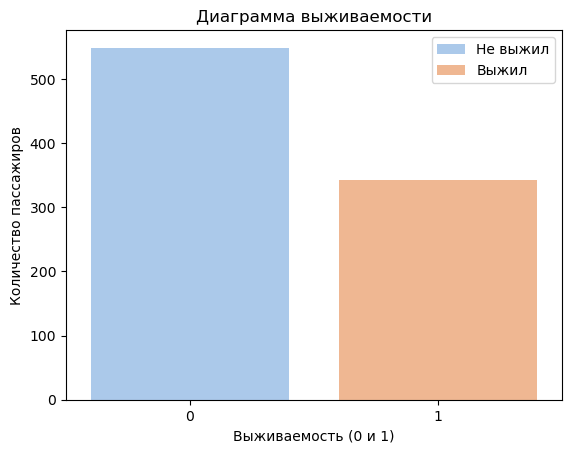

In [190]:
sns.countplot(
    x="Survived",
    data=df,
    hue="Survived"
)

plt.title("Диаграмма выживаемости")
plt.xlabel("Выживаемость (0 и 1)")
plt.ylabel("Количество пассажиров")
plt.legend(["Не выжил", "Выжил"])
plt.show()

Согласно диаграмме видно, что большинство погибло.

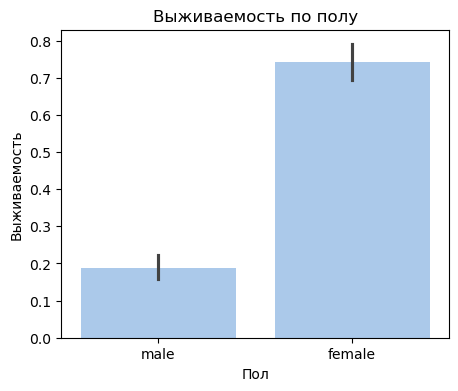

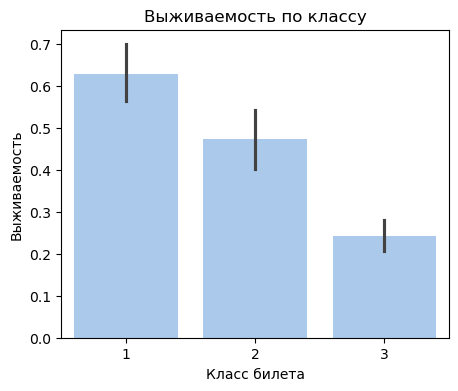

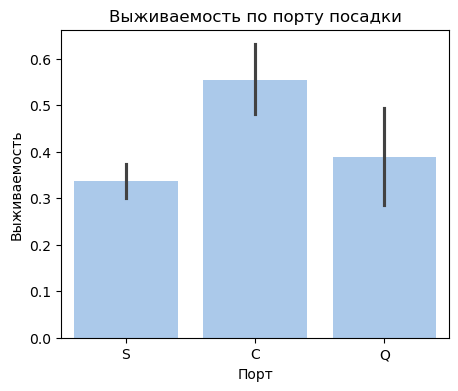

In [191]:
# Пол
fig, ax = plt.subplots(figsize=(5,4))
sns.barplot(data=df, x="Sex", y="Survived", ax=ax)
ax.set_title("Выживаемость по полу")
ax.set_xlabel("Пол")
ax.set_ylabel("Выживаемость")
plt.show()

# Класс
fig, ax = plt.subplots(figsize=(5,4))
sns.barplot(data=df, x="Pclass", y="Survived", ax=ax)
ax.set_title("Выживаемость по классу")
ax.set_xlabel("Класс билета")
ax.set_ylabel("Выживаемость")
plt.show()

# Порт
fig, ax = plt.subplots(figsize=(5,4))
sns.barplot(data=df, x="Embarked", y="Survived", ax=ax)
ax.set_title("Выживаемость по порту посадки")
ax.set_xlabel("Порт")
ax.set_ylabel("Выживаемость")
plt.show()

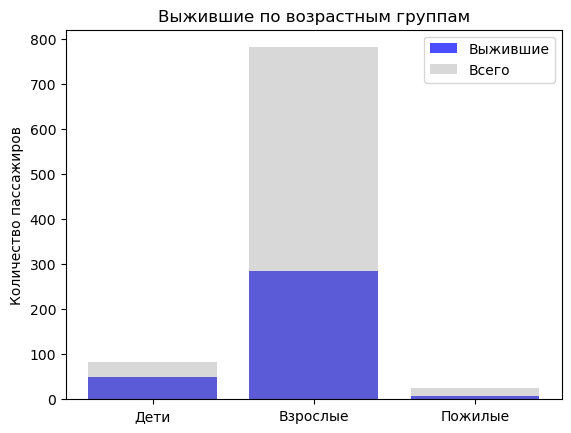

In [192]:
survived_counts = {
    "Дети": df.loc[df["AgeGroup_child"] == 1, "Survived"].sum(),
    "Взрослые": df.loc[df["AgeGroup_adult"] == 1, "Survived"].sum(),
    "Пожилые": df.loc[df["AgeGroup_senior"] == 1, "Survived"].sum()
}

total_counts = {
    "Дети": df["AgeGroup_child"].sum(),
    "Взрослые": df["AgeGroup_adult"].sum(),
    "Пожилые": df["AgeGroup_senior"].sum()
}

plt.bar(survived_counts.keys(), survived_counts.values(), color="blue", alpha=0.7, label="Выжившие")
plt.bar(total_counts.keys(), total_counts.values(), color="gray", alpha=0.3, label="Всего")

plt.title("Выжившие по возрастным группам")
plt.ylabel("Количество пассажиров")
plt.legend()
plt.show()

Женщины выживали гораздо чаще мужчин.

1-й класс имел больше шансов, 3-й — меньше всего.

По портам: C > Q > S по доле выживших.

Дети имели больше шансов выжить. Но больше всего на борту находилось взрослых.

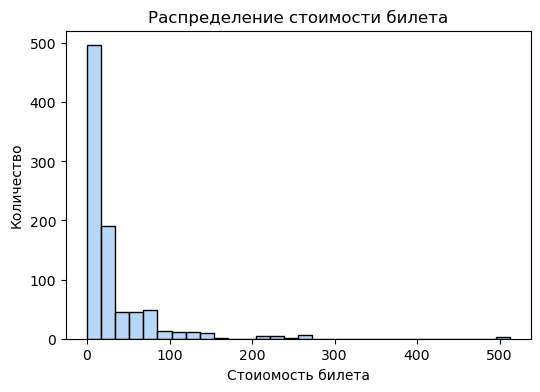

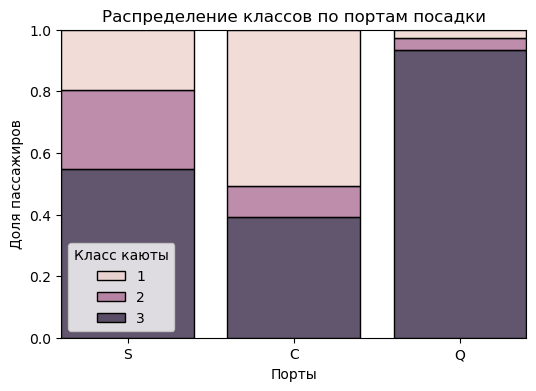

In [193]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(df["Fare"], bins=30, ax=ax)
ax.set_title("Распределение стоимости билета")
ax.set_xlabel("Стоиомость билета")
ax.set_ylabel("Количество")
plt.show()

fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data=df, x="Embarked", hue="Pclass", multiple="fill", shrink=0.8, ax=ax, legend=True)
ax.set_title("Распределение классов по портам посадки")
ax.set_ylabel("Доля пассажиров")
ax.set_xlabel("Порты")
leg = ax.get_legend()
leg.set_title("Класс каюты")
plt.show()

У тарифа есть большой выброс, его стоит в дальнейшем логарифмировать. Наибольшее количество пассажиров первого класса сели в Шербуре, поэтому выживаемоть по этому значению больше, а так порт посадки ни на что не влияет.


У первого класса почти всегда были прописаны каюты. У третьего класса 

In [194]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

df.drop(["Name", "SibSp", "Parch"], axis=1, inplace=True)

In [195]:
df["FamilySize"].value_counts().sort_index()

FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64

Больше всего одиночек (FamilySize=1), семьи 2–4 встречаются часто. Большие семьи (5+) редки.

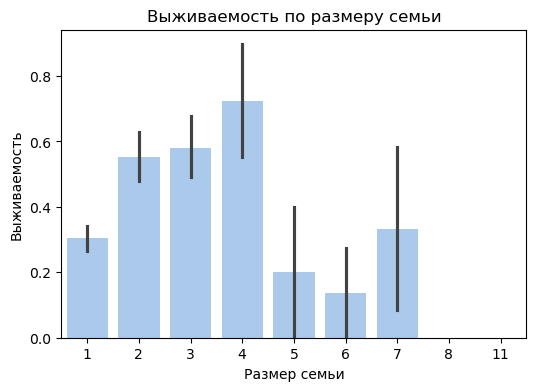

In [196]:
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data=df, x="FamilySize", y="Survived", ax=ax)
ax.set_title("Выживаемость по размеру семьи")
ax.set_xlabel("Размер семьи")
ax.set_ylabel("Выживаемость")
plt.show()

Наилучшие шансы у малых семей (2–4 чел.). Одиночки и очень большие семьи выживали хуже. 

In [197]:
df.groupby("FamilySize")["Survived"].mean().round(2)

FamilySize
1     0.30
2     0.55
3     0.58
4     0.72
5     0.20
6     0.14
7     0.33
8     0.00
11    0.00
Name: Survived, dtype: float64

In [198]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df

,PassengerId,Survived,Pclass,Sex,Ticket,Fare,Embarked,AgeGroup_child,AgeGroup_adult,AgeGroup_senior,FamilySize
0,1,0,3,0,A/5 21171,7.2500,S,0,1,0,2
1,2,1,1,1,PC 17599,71.2833,C,0,1,0,2
2,3,1,3,1,STON/O2. 3101282,7.9250,S,0,1,0,1
3,4,1,1,1,113803,53.1000,S,0,1,0,2
4,5,0,3,0,373450,8.0500,S,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,211536,13.0000,S,0,1,0,1
887,888,1,1,1,112053,30.0000,S,0,1,0,1
888,889,0,3,1,W./C. 6607,23.4500,S,0,1,0,4
889,890,1,1,0,111369,30.0000,C,0,1,0,1


In [199]:
df.drop(columns=["PassengerId", "Ticket", "Embarked"], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Fare,AgeGroup_child,AgeGroup_adult,AgeGroup_senior,FamilySize
0,0,3,0,7.2500,0,1,0,2
1,1,1,1,71.2833,0,1,0,2
2,1,3,1,7.9250,0,1,0,1
3,1,1,1,53.1000,0,1,0,2
4,0,3,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,0,13.0000,0,1,0,1
887,1,1,1,30.0000,0,1,0,1
888,0,3,1,23.4500,0,1,0,4
889,1,1,0,30.0000,0,1,0,1


In [200]:
df["Fare_log"] = np.log1p(df["Fare"])
df.drop(columns=["Fare"], axis=1, inplace=True)
df

,Survived,Pclass,Sex,AgeGroup_child,AgeGroup_adult,AgeGroup_senior,FamilySize,Fare_log
0,0,3,0,0,1,0,2,2.110213
1,1,1,1,0,1,0,2,4.280593
2,1,3,1,0,1,0,1,2.188856
3,1,1,1,0,1,0,2,3.990834
4,0,3,0,0,1,0,1,2.202765
...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,0,1,2.639057
887,1,1,1,0,1,0,1,3.433987
888,0,3,1,0,1,0,4,3.196630
889,1,1,0,0,1,0,1,3.433987


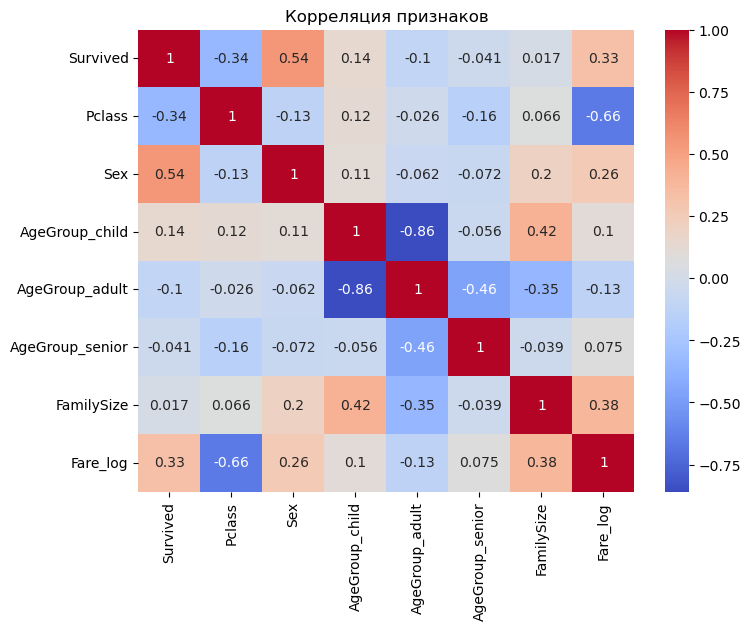

In [201]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Корреляция признаков")
plt.show()

Survived отрицательно коррелирует с Pclass (чем выше класс (т.е. ближе к 1), тем больше шанс).

Survived положительно коррелирует с Fare (чем дороже билет, тем больше шанс).

Survived положительно коррелирует с Sex (у женщин (1) шанс выжить больше).

Среди возрастных групп, категория детей имеет слабую положительную связь, т.к. у них выживаемость лучше.

С размером семьи корреляция слабая, но графики показали, что 2–4 чел. лучше.


#### Сильнее всего на выживаемость влияли: Sex, Pclass, Fare (пол, класс билета, стоимость билета). Age имеет эффект (дети чаще спасались), но общая корреляция слабая.

### Вывод:

В датасете Титаника у нас 891 пассажир и 12 признаков. Данные в целом чистые, но есть важные пропуски: в графе с каютами большинство значений отсутствует, в возрасте примерно пятая часть пропусков, а в порте посадки всего два пустых значения. Полных дубликатов строк нет, а повторы встречаются в билетах и каютах, что может быть связано с тем, это были семьи.

Выжило меньше половины пассажиров, большинство погибло.

Наибольшее влияние на шансы выжить оказали пол и класс каюты. Женщины спасались намного чаще мужчин. Пассажиры первого класса имели лучшие условия и более высокие шансы на спасение, тогда как в третьем классе выживало меньше всего людей.

Порт посадки тоже оказывал косвенное влияние. Те, кто сел на корабль в Шербуре, имели лучшие шансы, чем пассажиры из Саутгемптона или Квинстауна. Это связано с тем, что из Шербура садилось больше состоятельных пассажиров высокого класса.

Возраст тоже играл роль. Дети имели преимущество и чаще спасались. Мужчины среднего возраста выживали хуже всего.

Стоимость билета тоже отражала социальное положение. Чем дороже билет, тем выше вероятность спасения (связано с классом билета).

Больше всего на корабле было одиночек, и именно они имели низкие шансы на выживание. Наилучшие результаты показывали малые семьи — два, три или четыре человека. Очень большие семьи, напротив, выживали хуже.

В целом можно сказать, что женщине или ребёнку из первой или второй класса каюты, купившей дорогой билет и путешествующей с небольшой семьёй, было значительно проще спастись.

## Алгоритм логистической регрессии

In [202]:
df = pd.get_dummies(df, columns=["Pclass"])

pclass_dummies = ["Pclass_1", "Pclass_2", "Pclass_3"]
df[pclass_dummies] = df[pclass_dummies].astype(int)

df

,Survived,Sex,AgeGroup_child,AgeGroup_adult,AgeGroup_senior,FamilySize,Fare_log,Pclass_1,Pclass_2,Pclass_3
0,0,0,0,1,0,2,2.110213,0,0,1
1,1,1,0,1,0,2,4.280593,1,0,0
2,1,1,0,1,0,1,2.188856,0,0,1
3,1,1,0,1,0,2,3.990834,1,0,0
4,0,0,0,1,0,1,2.202765,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,1,0,1,2.639057,0,1,0
887,1,1,0,1,0,1,3.433987,1,0,0
888,0,1,0,1,0,4,3.196630,0,0,1
889,1,0,0,1,0,1,3.433987,1,0,0


In [203]:
X = df.drop(columns=["Survived"])
y = df["Survived"].values

In [210]:
# Делим данные на тестовые и тренировочные, а также стандартизируем их
train_size = int(0.8 * len(X))

train_df = df.iloc[:train_size].copy()
test_df  = df.iloc[train_size:].copy()

y_train = train_df["Survived"].values
y_test  = test_df["Survived"].values

X_train_df = train_df.drop(columns=["Survived"])
X_test_df  = test_df.drop(columns=["Survived"])

for col in ["FamilySize", "Fare_log"]:
    mean_ = X_train_df[col].mean()
    std_  = X_train_df[col].std()
    
    X_train_df[col] = (X_train_df[col] - mean_) / std_
    X_test_df[col]  = (X_test_df[col] - mean_) / std_

X_train = X_train_df.values
X_test  = X_test_df.values

In [237]:
def predict(X, w, b):
    """
    Возвращает предсказанные вероятности принадлежности к классу 1.
    
    Args:
        X: numpy массив
        w: numpy массив весов формы (n,).
        b: число, смещение (bias).
    
    Returns:
        numpy массив вероятностей формы (m,).
    """
    probabilities = []
    for i in range(len(X)):
        z = 0
        for j in range(len(w)):
            z += w[j] * X[i][j]
        z += b
        probability = 1 / (1 + np.exp(-z))
        probabilities.append(probability)
    return np.array(probabilities)


def compute_loss_and_grads(X, y, w, b):
    """
    Считает функцию потерь (log-loss) и градиенты по w и b.
    
    Args:
        X: (m, n) признаки
        y: (m,) ответы (0 или 1)
        w: (n,) веса
        b: число
    
    Returns:
        loss: значение функции потерь
        dw: numpy массив (n,) — производные по весам
        db: число — производная по смещению
    """
    m = len(y)
    eps = 1e-15
    p = predict(X, w, b)
    log_loss = -np.mean(y * np.log(np.clip(p, eps, 1)) + (1 - y) * np.log(np.clip(1 - p, eps, 1)))

    error = p - y
    dw = np.zeros_like(w)
    for j in range(len(w)):
        dw[j] = np.sum(error * X[:, j]) / m
    db = np.sum(error) / m

    return log_loss, dw, db

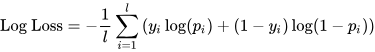

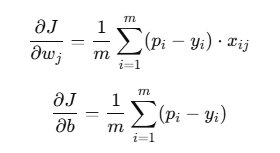

In [238]:
def fit(X, y, lr=0.1, epochs=2000):
    """
    Обучает модель логистической регрессии с помощью градиентного спуска.
    
    Args:
        X: (m, n) признаки
        y: (m,) ответы (0 или 1)
        lr: скорость обучения
        epochs: количество итераций
    
    Returns:
        w: обученные веса
        b: обученное смещение
    """
    n = X.shape[1]
    np.random.seed(42)
    w = np.random.randn(n) * 0.01
    b = 0.0

    for i in range(epochs):
        log_loss, dw, db = compute_loss_and_grads(X, y, w, b)
        w -= lr * dw
        b -= lr * db

        if i % 500 == 0:
            print(f"Эпоха {i}, log_loss={log_loss:.4f}")

    return w, b


def accuracy(X, y, w, b):
    p = predict(X, w, b)
    preds = (p >= 0.5).astype(int)
    return (preds == y).mean()


def print_weights(w, feature_names):
    """
    Печатает веса модели вместе с названиями признаков.
    """
    for name, weight in zip(feature_names, w):
        print(f"{name:20s} {weight:.4f}")

In [250]:
w, b = fit(X_train, y_train, lr=0.1, epochs=3000)

print("Train accuracy:", accuracy(X_train, y_train, w, b))
print("Test accuracy:", accuracy(X_test, y_test, w, b))

feature_names = X_train_df.columns.tolist()
print_weights(w, feature_names)
b

Эпоха 0, log_loss=0.6929
Эпоха 500, log_loss=0.4610
Эпоха 1000, log_loss=0.4548
Эпоха 1500, log_loss=0.4536
Эпоха 2000, log_loss=0.4530
Эпоха 2500, log_loss=0.4527
Train accuracy: 0.7935393258426966
Test accuracy: 0.8268156424581006
Sex                  2.7221
AgeGroup_child       0.8397
AgeGroup_adult       -0.5316
AgeGroup_senior      -0.9828
FamilySize           -0.6044
Fare_log             0.3913
Pclass_1             0.3231
Pclass_2             -0.0488
Pclass_3             -0.9505


np.float64(-0.6950426593732574)

Sex = +2.72 - самый сильный признак. Женщины имели намного больше шансов выжить.

AgeGroup_child = +0.84 - дети тоже имели повышенные шансы.

AgeGroup_adult = -0.53, AgeGroup_senior = -0.98 - взрослым и особенно пожилым было сложнее выжить.

FamilySize = -0.60 → большие семьи - меньше шансов (вероятно, сложнее эвакуироваться).

Fare_log = +0.39 - дорогой билет (более «элитное» место) повышал шансы.

Pclass_3 = -0.95 - третий класс сильно снижал вероятность выживания.

Pclass_1 = +0.32 - первый класс помогал.

Pclass_2 = -0.05 - почти не играет роли.

## sklearn

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_test = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

y_probs_train = log_reg.predict_proba(X_train)[:, 1]
y_probs_test = log_reg.predict_proba(X_test)[:, 1]

print("Survived:", sum(y_pred != 0))
print("Not survived:", sum(y_pred == 0))

Survived: 67
Not survived: 112


In [268]:
print("Sklearn train accuracy:", accuracy_score(y_train, y_pred_train))
print("Sklearn test accuracy :", accuracy_score(y_test, y_pred_test))

Sklearn train accuracy: 0.7935393258426966
Sklearn test accuracy : 0.8268156424581006


In [269]:
print("Sklearn train log_loss:", log_loss(y_train, y_probs_train))
print("Sklearn test log_loss :", log_loss(y_test, y_probs_test))

Sklearn train log_loss: 0.45295357946971926
Sklearn test log_loss : 0.38452678721225736


In [272]:
log_reg.coef_

array([[ 2.59144416,  1.00546637, -0.26538163, -0.74419169, -0.56724148,
         0.39293476,  0.51598656,  0.1716121 , -0.69170561]])

In [271]:
log_reg.intercept_[0]

np.float64(-1.1318342685341176)